#                         A first linear regression model with sklearn package.
*In this project, I will implement  a multiple linear regression model. I am using the data 'Auto.csv' from the book Introduction to statistical learning with application with R by Gareth et al.* The data set can be fetched from the following  <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/data.html"> Auto_csv()</a>

Our goal is to build a model to predict the horsepower of a car from its mpg (mile per gallon of cars), accelaration, cylinders, displacement, and weight.

In [27]:
# First I am importing some necessary packages for the implementation, namely numpy
# panda and csv since the data is in a csv format
import numpy as np
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_values = ["?"] # I did this because I knew that the dataset contains some dquestion marks
data = pd.read_csv("Auto.csv",na_values = missing_values) # I took the question marks as missing values.

In [8]:
sns.set()
sns.pairplot(data, height=2.5); # pairplot with seaborn

*First of all, we need to understand our data. We look at the dimension of the data set. How many rows and columns does the data contain? types of each elements in the data set.*

In [9]:
data.shape # here we do have 9 features and 398 data points (N,D)=(397,9).
# 397 because Python index starts by 0

(392, 9)

In [10]:
data.dtypes # To know the type of data we are dealing with

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [11]:
data.isnull().any() # looking for missing values.

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [12]:
data.dropna(axis=0, inplace=True) # We are dropping the missing values as they generally hurt ML algorithm.

In [13]:
new_shape=data.shape
new_shape

(392, 9)

In [14]:
# This present all the elements of the data set and their types. Also the memory
# used by the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


*Now we will get some statistical info from our data set. This is done through the comment name of data set.describe*

In [15]:
# We are now getting some statistical information on our data set.
pd.set_option('display.width', 100) # set the width of the display
pd.set_option('precision', 3) # Set the precision, here we are asking for 3 order of precision
description = data.describe()
print(description)

           mpg  cylinders  displacement  horsepower    weight  acceleration     year   origin
count  392.000    392.000       392.000     392.000   392.000       392.000  392.000  392.000
mean    23.446      5.472       194.412     104.469  2977.584        15.541   75.980    1.577
std      7.805      1.706       104.644      38.491   849.403         2.759    3.684    0.806
min      9.000      3.000        68.000      46.000  1613.000         8.000   70.000    1.000
25%     17.000      4.000       105.000      75.000  2225.250        13.775   73.000    1.000
50%     22.750      4.000       151.000      93.500  2803.500        15.500   76.000    1.000
75%     29.000      8.000       275.750     126.000  3614.750        17.025   79.000    2.000
max     46.600      8.000       455.000     230.000  5140.000        24.800   82.000    3.000


One could see that the name variable is missing because it is not numerical, therefore no numerical calculations could be donne on it.

## Preparation of the data for the machine learning algorithm

## `Dropping the columns I don't need`
Since I don't need the origin, the year and the name columns I am going to drop them before I continue. However it is not compulsory to do so. I am doing this because I am not considering as features in my prediction

In [16]:
data=data.drop(['name','origin','year'],axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


Now I get rid of the columns I don't need in my prediction. Let me now look at the correlation matrix.

In [17]:
# Looking at the correction between the features of our data set. Pearson correlation in this case
pd.set_option('precision', 3)
corr_matrix = data.corr()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000,-0.778,-0.805,-0.778,-0.832,0.423
cylinders,-0.778,1.000,0.951,0.843,0.898,-0.505
displacement,-0.805,0.951,1.000,0.897,0.933,-0.544
horsepower,-0.778,0.843,0.897,1.000,0.865,-0.689
weight,-0.832,0.898,0.933,0.865,1.000,-0.417
acceleration,0.423,-0.505,-0.544,-0.689,-0.417,1.000


## `Splitting the data into training and test set.`

In [56]:
train_set=data.sample(frac=0.8,random_state=0)
test_set=data.drop(train_set.index)

## Visualizing the training set with seaborn
In order to get the best output from a ML algorithm,one needs to understand its data. One of the best ways to do so is to visualize your data. Seaborn library in Python is a nice one to use for this job. In the following, we show Histograms, density plots, Box and Whisker plots.

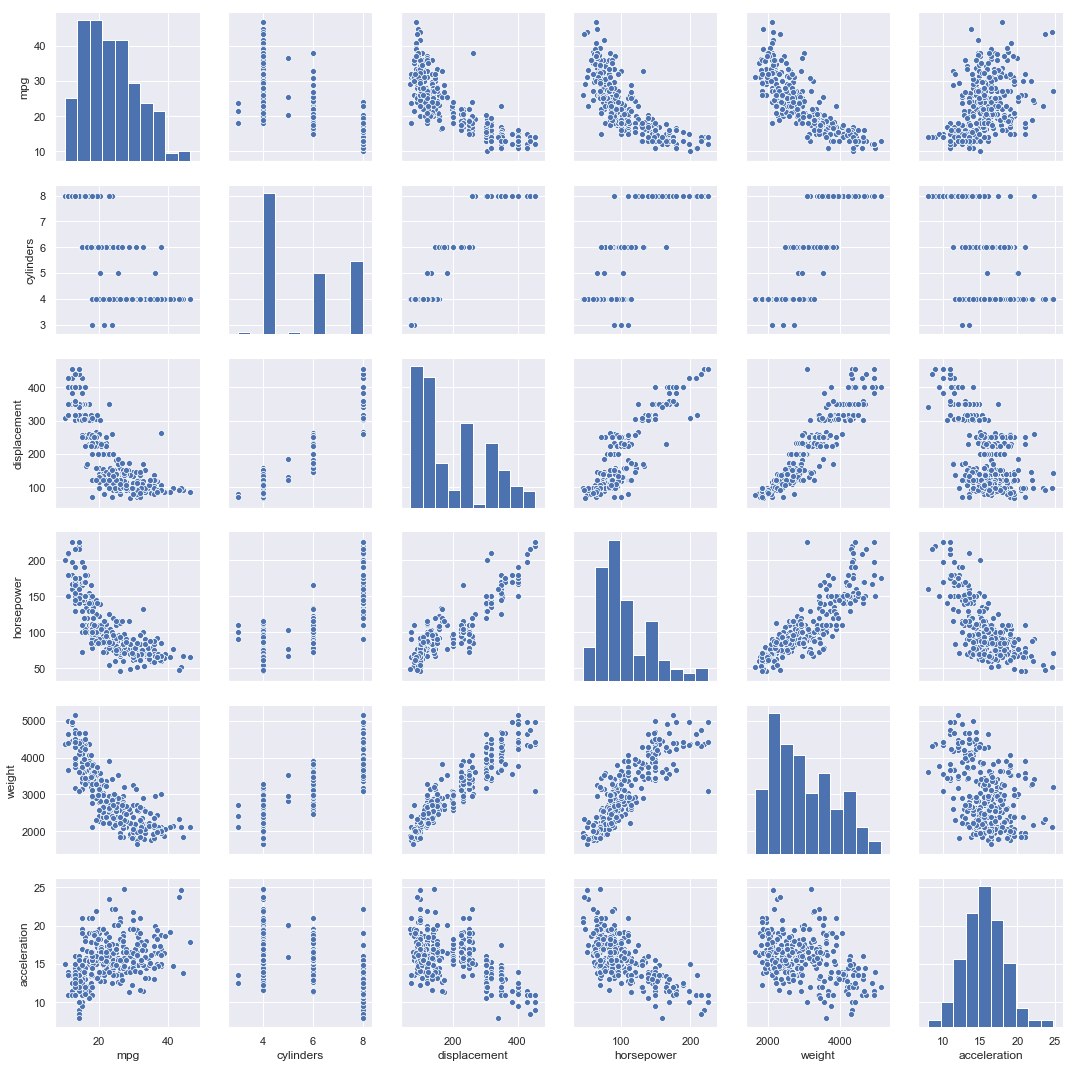

In [19]:
sns.set()
sns.pairplot(train_set, height=2.5);

## ` Defining the labels in our data set`

In [57]:
train_labels=train_set.pop('horsepower')
test_labels=test_set.pop('horsepower')

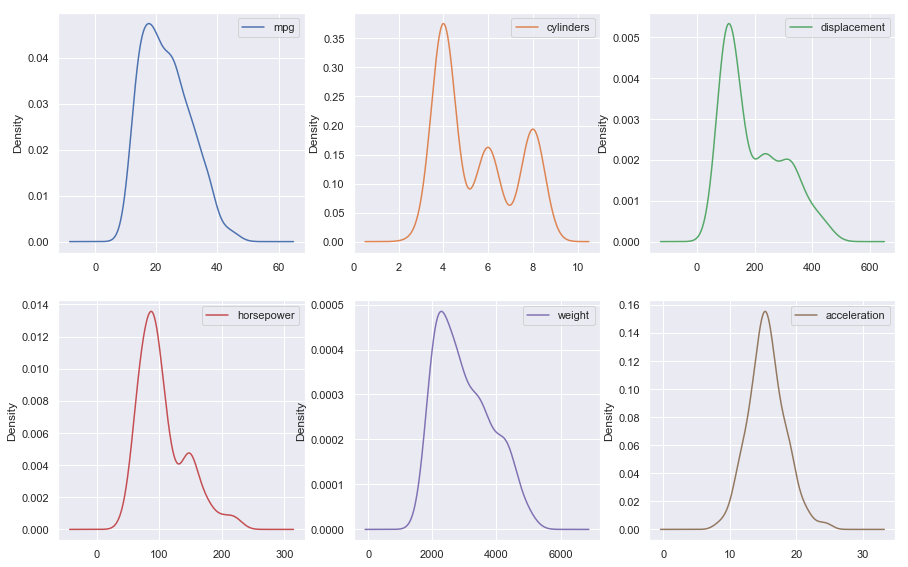

In [25]:
# density plot
train_set.plot(kind='density',figsize=(15,15), subplots=True, layout=(3,3), sharex=False)
plt.show()

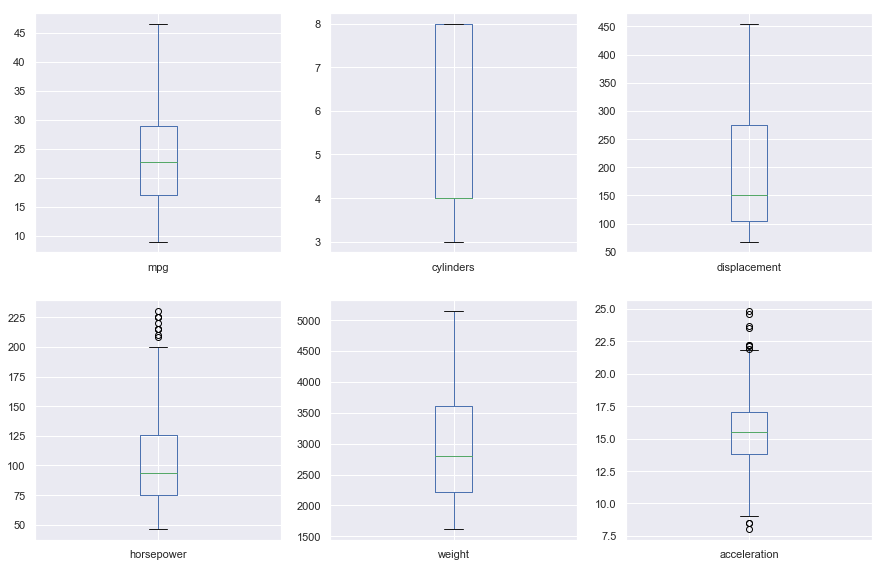

In [26]:
#Box plot. It gives information on the mean, the first and the third quartile
data.plot(kind='box',figsize=(15,15), subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

## Normalizing the training and test set
It is well know that the absence of normalization can hurt largely a ML algorithm. To prevent that we first write a function that will help normalize our data.

In [58]:
def Normalize(x):
    return (x-np.mean(x))/np.std(x)

In [59]:
# Normalizing the training and the test set
train_set=Normalize(train_set)
test_set=Normalize(test_set)

## Importing the necessary from the sklearn package

In [67]:

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

## `Training our model`

In [82]:
model=LinearRegression()
model.fit(train_set,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## `Printing the performance of our model`

In [81]:
train_accuracy=model.score(train_set,train_labels)
test_accuracy= model.score(test_set,test_labels)
print('The training and test accuracy are respectively', 100*train_accuracy, 'and', 100*test_accuracy)

The training and test accuracy are respectively 89.65430182714917 and 85.85487454909709


## `Plotting the prediction and the true values on the same graph`

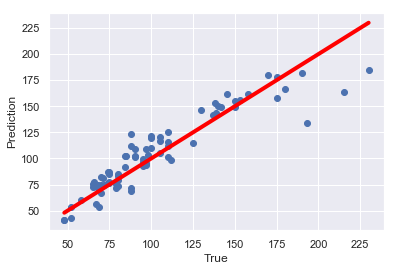

In [88]:
pred = model.predict(test_set)
fig, ax = plt.subplots()
ax.scatter(test_labels, pred)
ax.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'red', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Prediction')
plt.show()

## Last words
It is clair that our model performs a bit better on the training data than on the test data. It is a sign that we are overfitting our data. It is also possible that we increase the accuracy pf our model. We will look at that in other notebook.


To tackle relationship between many variables, multiple linear regression is a very useful algorithm. It is also the most used algorithm in supervised machine learning. It is great to get yourself familiar with it.